# Data Exploration

## Univariate analysis

In [6]:
import pandas as pd

df = pd.read_csv("./data/preprocessed/data_normalized.csv")
df = df[['language', 'is_root', 'n_norm',
         'degree_norm', 'closeness_norm', 'betweenness_norm', 'pagerank_norm',
         'katz_norm', 'load_norm']]
print(df.describe())

             is_root         n_norm    degree_norm  closeness_norm  \
count  197479.000000  197479.000000  197479.000000   197479.000000   
mean        0.053170       0.289166       0.287784        0.427790   
std         0.224373       0.133720       0.315252        0.283309   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.194030       0.000000        0.209816   
50%         0.000000       0.268657       0.250000        0.387288   
75%         0.000000       0.358209       0.500000        0.623968   
max         1.000000       1.000000       1.000000        1.000000   

       betweenness_norm  pagerank_norm      katz_norm      load_norm  
count     197479.000000  197479.000000  197479.000000  197479.000000  
mean           0.281812       0.303808       0.305130       0.281812  
std            0.329703       0.303504       0.301167       0.329703  
min            0.000000       0.000000       0.000000       0.000000  
25%           

In [7]:
# Verify that there are non NaN values
df.isna().sum()

language            0
is_root             0
n_norm              0
degree_norm         0
closeness_norm      0
betweenness_norm    0
pagerank_norm       0
katz_norm           0
load_norm           0
dtype: int64

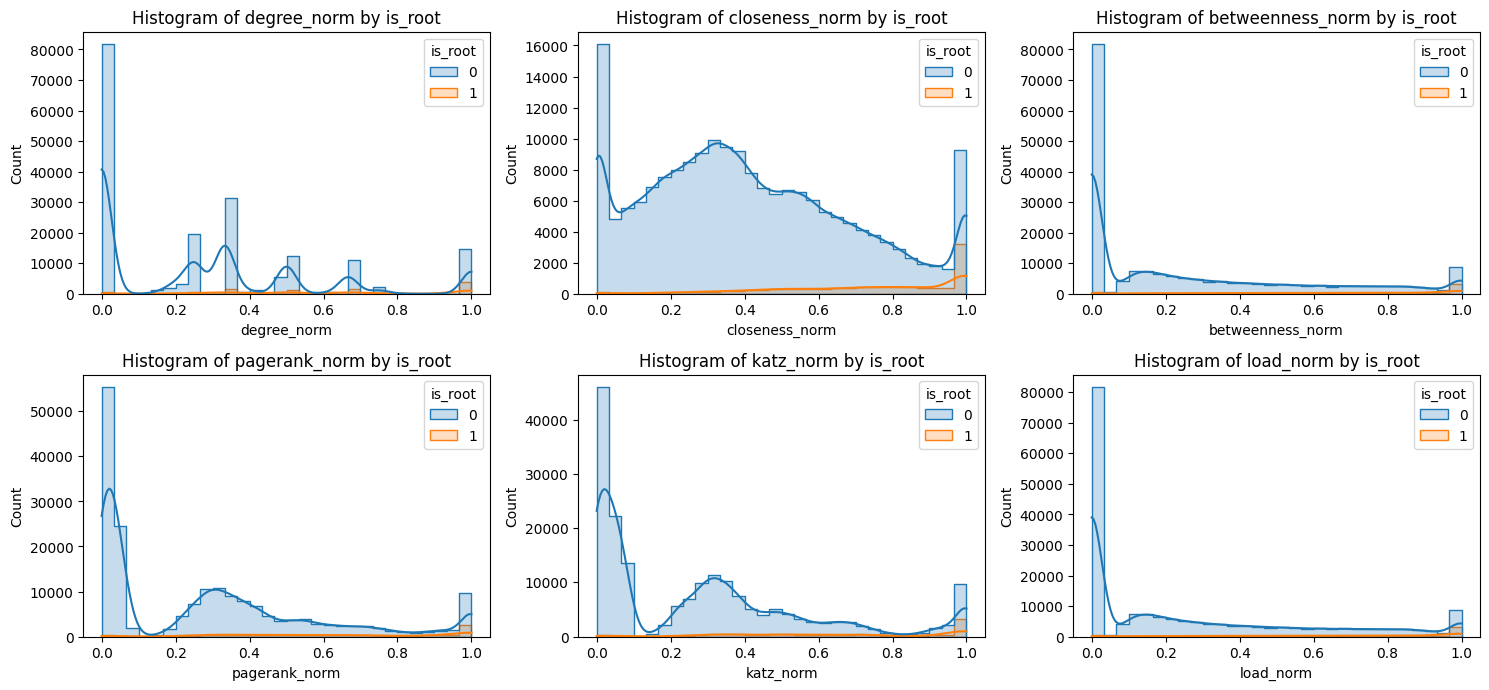

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Columns to visualize
labels = ['degree_norm', 'closeness_norm', 'betweenness_norm', 'pagerank_norm', 'katz_norm', 'load_norm']

# Create histograms for each label
plt.figure(figsize=(15, 10))
for i, label in enumerate(labels, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=label, hue='is_root', bins=30, kde=True, element='step', common_norm=False)
    plt.title(f'Histogram of {label} by is_root')
    plt.tight_layout()

plt.show()


## PCA Analysis 
With the next code it is performed the PCA Analysis

      language       PC1       PC2
0       Arabic  1.245149  0.252242
1      Chinese -2.687803 -0.378117
2        Czech  2.313117  0.174586
3      English -0.326309  0.139368
4      Finnish  1.168601 -1.287566
5       French -2.706639  0.391452
6     Galician -2.048735  0.546040
7       German -2.932925 -0.478748
8        Hindi -3.444066  0.048859
9    Icelandic  4.451967  0.436384
10  Indonesian  1.132265 -0.266214
11     Italian -1.382736  0.610503
12    Japanese  3.373774  1.739277
13      Korean  4.270167 -0.577796
14      Polish  1.113124 -0.626226
15  Portuguese -1.253502  0.357105
16     Russian  1.406299 -0.547874
17     Spanish -2.198082  0.258344
18     Swedish -0.577033 -0.198370
19        Thai -1.091400  0.763969
20     Turkish  0.174766 -1.357219


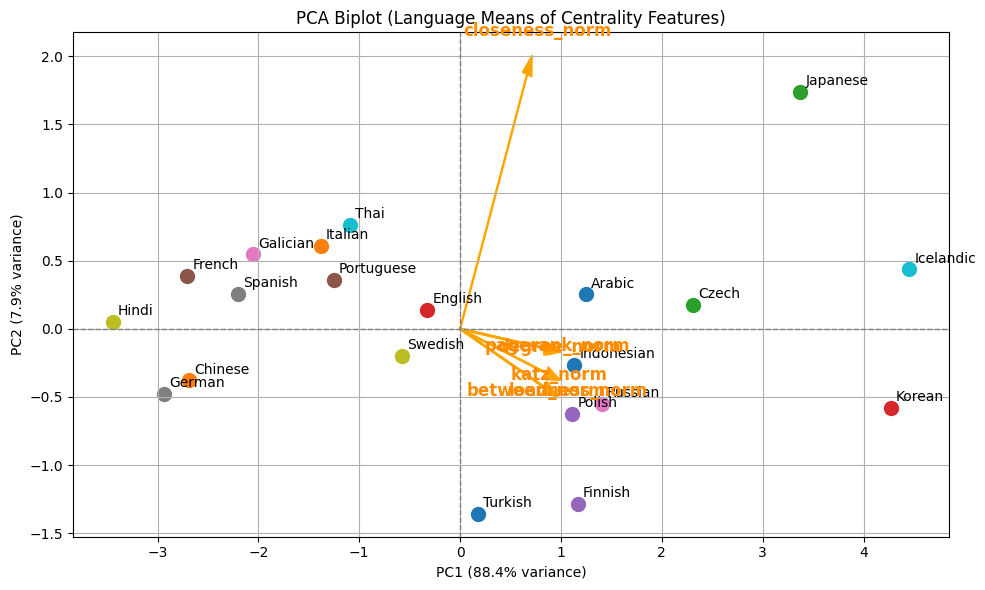

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Features and language
features = ['degree_norm', 'closeness_norm', 'betweenness_norm', 'pagerank_norm', 'katz_norm', 'load_norm']

# Step 1: Group by language and calculate mean of features
language_means = df.groupby('language')[features].mean().reset_index()

# Step 2: Standardize feature matrix
X = language_means[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Add PCA results to language_means
language_means['PC1'] = X_pca[:, 0]
language_means['PC2'] = X_pca[:, 1]

# (Optional) View or export PCA values
print(language_means[['language', 'PC1', 'PC2']])
# language_means.to_csv("language_pca_scores.csv", index=False)

# Step 5: Prepare loadings (variable vectors)
loadings = pca.components_.T  # shape (n_features, 2)

# Step 6: Plot
plt.figure(figsize=(10,6))
ax = plt.gca()

# Plot PCA positions for each language
for i, row in enumerate(X_pca):
    lang = language_means.loc[i, 'language']
    ax.scatter(row[0], row[1], s=100, label=lang)
    ax.text(row[0] + 0.05, row[1] + 0.05, lang, fontsize=10)

# Plot arrows for loadings (original features)
for i, feature in enumerate(features):
    ax.arrow(0, 0,
             loadings[i, 0]*2, loadings[i, 1]*2,
             color='orange', width=0.01, head_width=0.1)
    ax.text(loadings[i, 0]*2.3, loadings[i, 1]*2.3,
            feature, color='darkorange', fontsize=12, ha='center', weight='bold')

# Axes labels with explained variance
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax.set_title('PCA Biplot (Language Means of Centrality Features)')
ax.axhline(0, color='grey', lw=1, linestyle='--')
ax.axvline(0, color='grey', lw=1, linestyle='--')
ax.grid(True)
plt.tight_layout()
plt.show()
